# Personal Finance

Date: 10/1/2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# equity months: 2, 5, 8, 11
# bonus months: 5, 11
months_till_next_equity = 1
months_till_next_bonus = 6

car_principle = 29_397.66
min_student_loan_payment = 212.46

current_savings = 30_000
savings_target = 50_000

In [3]:
df_student = pd.DataFrame(data=[
    ['AA', 9_418.94, 3.150],
    ['AD', 2_707.57, 3.610],
], columns=['group', 'principle', 'apr'])

## Budget

### Income

In [4]:
base_salary = 190_550

In [5]:
bonus_factor = 0.12 # standard base
annual_bonus = base_salary * bonus_factor
biannual_bonus = annual_bonus / 2
print(f'annual_bonus = ${annual_bonus}')
print(f'biannual_bonus = ${biannual_bonus}')

annual_bonus = $22866.0
biannual_bonus = $11433.0


In [6]:
share_price = 365.00
num_shares = 202
annual_equity = share_price * num_shares
quarterly_equity = annual_equity / 4
print(f'annual_equity = ${annual_equity}')
print(f'quarterly_equity = ${quarterly_equity}')

annual_equity = $73730.0
quarterly_equity = $18432.5


In [7]:
tax_rate = 0.34
bonus_tax_rate = 0.42

In [8]:
other_monthly_income = 0

In [9]:
annual_compensation = base_salary + annual_equity + annual_bonus
print(f'annual_compensation = ${annual_compensation}')

annual_compensation = $287146.0


In [10]:
total_annual_income = annual_compensation + 8 * other_monthly_income # for 2024
print(f'total_annual_income = ${total_annual_income}')

total_annual_income = $287146.0


In [11]:
net_annual_income = base_salary * (1 - tax_rate) + (annual_equity + annual_bonus) * (1 - bonus_tax_rate) + 8 * other_monthly_income
print(f'net_annual_income = ${net_annual_income}')

net_annual_income = $181788.68


In [12]:
monthly_salary = base_salary / 12
print(f'monthly_salary = ${round(monthly_salary, 2)}')

monthly_salary = $15879.17


In [13]:
total_monthly_income = base_salary / 12 + other_monthly_income
print(f'total_monthly_income = ${round(total_monthly_income, 2)}')

total_monthly_income = $15879.17


In [14]:
net_monthly_income = base_salary * (1 - tax_rate) / 12 + other_monthly_income
print(f'net_monthly_income = ${round(net_monthly_income, 2)}')

net_monthly_income = $10480.25


In [15]:
total_per_paycheck = base_salary / 12 / 2
print(f'total_per_paycheck = ${round(total_per_paycheck, 2)}')

total_per_paycheck = $7939.58


In [16]:
net_per_paycheck = total_per_paycheck * (1 - tax_rate)
print(f'net_per_paycheck = ${round(net_per_paycheck, 2)}')

net_per_paycheck = $5240.12


In [17]:
net_quarterly_equity = quarterly_equity * (1 - bonus_tax_rate)
print(f'net_quarterly_equity = ${round(net_quarterly_equity, 2)}')

net_quarterly_equity = $10690.85


In [18]:
net_biannual_bonus = biannual_bonus * (1 - bonus_tax_rate)
print(f'net_biannual_bonus = ${round(net_biannual_bonus, 2)}')

net_biannual_bonus = $6631.14


In [19]:
effective_total_monthly_income = total_monthly_income + annual_bonus / 12 + annual_equity / 12
print(f'effective_total_monthly_income = ${round(effective_total_monthly_income, 2)}')

effective_total_monthly_income = $23928.83


In [20]:
effective_net_monthly_income = net_annual_income / 12
print(f'effective_net_monthly_income = ${round(effective_net_monthly_income, 2)}')

effective_net_monthly_income = $15149.06


### Costs

In [21]:
fixed_costs = sum([
    3000, # rent
    170, # utilities
    50, # health insurance
    150, # car insurance
    50, # subscriptions
    min_student_loan_payment, # student loans
    1249, # car loan
])

print(f'fixed_costs = ${fixed_costs}')

fixed_costs = $4881.46


In [22]:
variable_costs_sc = sum([
    30 * 30, # food + coffee + alcohol
    100, # gas
    450 + 150, # travel (GSP-SFO airfare + 1 hotel)
    200, # misc
])

print(f'variable_costs_sc = ${variable_costs_sc}')

variable_costs_sc = $1800


In [23]:
variable_costs_ca = sum([
    50 * 30, # food + coffee + alcohol
    300, # gas
    450 + 4 * 150, # travel (GSP-SFO airfare + 4 hotels)
    200, # misc
])

print(f'variable_costs_ca = ${variable_costs_ca}')

variable_costs_ca = $3050


In [24]:
total_monthly_costs_sc = fixed_costs + variable_costs_sc
print(f'total_monthly_costs_sc = ${total_monthly_costs_sc}')

total_monthly_costs_sc = $6681.46


In [25]:
total_monthly_costs_ca = fixed_costs + variable_costs_ca
print(f'total_monthly_costs_ca = ${total_monthly_costs_ca}')

total_monthly_costs_ca = $7931.46


In [26]:
pct_time_in_sc = 0.5
avg_total_monthly_costs = pct_time_in_sc * total_monthly_costs_sc + (1 - pct_time_in_sc) * total_monthly_costs_ca
print(f'avg_total_monthly_costs = ${avg_total_monthly_costs}')

avg_total_monthly_costs = $7306.46


In [27]:
total_annual_costs = total_monthly_costs_sc * 6 + total_monthly_costs_ca * 6
print(f'total_annual_costs = ${total_annual_costs}')

total_annual_costs = $87677.52


### Profits

In [28]:
avg_monthly_profit = net_monthly_income - avg_total_monthly_costs
print(f'avg_monthly_profit = ${round(avg_monthly_profit, 2)}')

avg_monthly_profit = $3173.79


In [29]:
avg_effective_monthly_profit = effective_net_monthly_income - avg_total_monthly_costs
print(f'avg_effective_monthly_profit = ${round(avg_effective_monthly_profit, 2)}')

avg_effective_monthly_profit = $7842.6


In [30]:
annual_profit = net_annual_income - total_annual_costs
print(f'annual_profit = ${round(annual_profit, 2)}')

annual_profit = $94111.16


## Student Loan

In [31]:
df_student['monthly_interest'] = (df_student['principle'] * df_student['apr'] / 12 / 100).round(2)
df_student

,group,principle,apr,monthly_interest
0,AA,9418.94,3.15,24.72
1,AD,2707.57,3.61,8.15


In [32]:
effective_student_apr = np.dot(df_student['principle'] / df_student['principle'].sum(), df_student['apr'])
print(f'effective_student_apr = {round(effective_student_apr, 3)}%')

effective_student_apr = 3.253%


In [33]:
total_student_principle = df_student['principle'].sum()
print(f'total_student_principle = ${round(total_student_principle, 2)}')

total_student_principle = $12126.51


In [34]:
def amortization_schedule(df, min_payment, extra_payments=[], start_at=0):
    df = df[df['principle'] > 0].copy()
    month = start_at
    amortization_records = [{
            'month': month,
            'total_payment': 0,
            'interest_paid': 0,
            'principal_paid': 0,
            'remaining_balance': df['principle'].sum()
    }]
    total_principal = df['principle'].sum()
    while total_principal > 0:
        month += 1
        monthly_interest = df['monthly_interest'].sum()
        total_payment = min_payment
        for extra_payment in extra_payments:
            if month >= extra_payment['shift_by'] and (month - extra_payment.get('shift_by', 0)) % extra_payment['num_months'] == 0:
                total_payment += extra_payment['amount']
        principal_payment = max(0, total_payment - monthly_interest)
        if total_principal + monthly_interest < total_payment:
            principal_payment = total_principal
            min_payment = principal_payment + monthly_interest
        total_principal -= principal_payment
        amortization_records.append({
            'month': month,
            'total_payment': total_payment,
            'interest_paid': monthly_interest,
            'principal_paid': principal_payment,
            'remaining_balance': total_principal
        })
        df['payment_proportion'] = df['principle'] / df['principle'].sum()
        df['principle'] -= df['payment_proportion'] * principal_payment
        df['monthly_interest'] = (df['principle'] * df['apr'] / 12 / 100).round(2)
        if total_principal <= 1:
            break
    return pd.DataFrame(amortization_records)

In [35]:
extra_payments = [
    {'num_months': 1, 'amount': 1500, 'shift_by': 0},
    {'num_months': 3, 'amount': net_biannual_bonus, 'shift_by': months_till_next_equity},
    {'num_months': 6, 'amount': net_quarterly_equity, 'shift_by': months_till_next_bonus},
]
amortization_df = amortization_schedule(df_student, min_student_loan_payment, extra_payments) # as of June 1
amortization_df

,month,total_payment,interest_paid,principal_paid,remaining_balance
0,0,0.00,0.00,0.00,12126.51
1,1,8343.60,32.87,8310.73,3815.78
2,2,1712.46,10.34,1702.12,2113.66
3,3,1712.46,5.73,1706.73,406.93
4,4,8343.60,1.10,406.93,0.00


In [36]:
num_months_remaining_student = amortization_df['month'].iloc[-1]
print(f'num_months_remaining_student = {num_months_remaining_student}')

num_months_remaining_student = 4


In [37]:
print(f'num_years_remaining_student = {num_months_remaining_student // 12}')
print(f'num_months_leftover_remaining_student = {num_months_remaining_student % 12}')

num_years_remaining_student = 0
num_months_leftover_remaining_student = 4


In [38]:
leftover_student_payment = amortization_df['total_payment'].iloc[-1] - amortization_df['remaining_balance'].iloc[-2]
print(f'leftover_student_payment = ${round(leftover_student_payment, 2)}')

leftover_student_payment = $7936.67


## Car Loan

In [39]:
car_payment = 1249.36
car_apr = 1.99

remaining_car_principle = car_principle - num_months_remaining_student * (car_payment / (1 - car_apr / 100)) - leftover_student_payment
df_car = pd.DataFrame(data=[[remaining_car_principle, car_apr]], columns=['principle', 'apr'])
df_car['principle'] = df_car['principle'].round(2)
df_car['monthly_interest'] = (df_car['principle'] * df_car['apr'] / 12 / 100).round(2)
df_car

,principle,apr,monthly_interest
0,16362.08,1.99,27.13


In [40]:
extra_payments = [
    {'num_months': 1, 'amount': 1500, 'shift_by': 0},
    {'num_months': 3, 'amount': net_biannual_bonus, 'shift_by': months_till_next_equity},
    {'num_months': 6, 'amount': net_quarterly_equity, 'shift_by': months_till_next_bonus},
]
amortization_df = amortization_schedule(df_car, car_payment, extra_payments, start_at=num_months_remaining_student)
amortization_df

,month,total_payment,interest_paid,principal_paid,remaining_balance
0,4,0.00,0.00,0.00,16362.08
1,5,2749.36,27.13,2722.23,13639.85
2,6,13440.21,22.62,13417.59,222.26
3,7,9380.50,0.37,222.26,0.00


In [41]:
num_months_remaining_car = amortization_df['month'].iloc[-1]
print(f'num_months_remaining_car = {num_months_remaining_car}')

num_months_remaining_car = 7


In [42]:
print(f'num_years_remaining_car = {num_months_remaining_car // 12}')
print(f'num_leftover_months_remaining_car = {num_months_remaining_car % 12}')

num_years_remaining_car = 0
num_leftover_months_remaining_car = 7


In [43]:
leftover_car_payment = amortization_df['total_payment'].iloc[-1] - amortization_df['remaining_balance'].iloc[-2]
print(f'leftover_car_payment = ${round(leftover_car_payment, 2)}')

leftover_car_payment = $9158.24


## Timeline

In [44]:
num_months_loans = num_months_remaining_student + num_months_remaining_car - num_months_remaining_student
print(f'num_months_loans = {num_months_loans}')

num_months_loans = 7


In [45]:
current_balance = current_savings + leftover_car_payment
monthly_profit_no_loans = avg_effective_monthly_profit + min_student_loan_payment + car_payment + other_monthly_income
print(f'monthly_profit_no_loans = ${round(monthly_profit_no_loans, 2)}')

monthly_profit_no_loans = $9304.42


In [46]:
num_months_to_save = round((savings_target - current_balance) / monthly_profit_no_loans)
print(f'num_months_to_save = {num_months_to_save}')

num_months_to_save = 1


In [47]:
num_months_remaining = num_months_loans + num_months_to_save
print(f'num_months_remaining = {num_months_remaining}')

num_months_remaining = 8


In [48]:
# Student Loans Paid: Dec-Jan 2024
# Car Paid: Apr-May 2025
# Savings Met: Aug-Sep 2025
# depends mainly on how much extra paid per month (which depends on spending)

In [49]:
# import matplotlib.pyplot as plt
# import numpy as np

# L = 2
# h = 1

# x = np.linspace(-L, L, 1000)
# f = lambda x: h * np.where((-L <= x) & (x <= -L/2), 0, np.where((-L/2 < x) & (x < L/2), 1, np.where((L/2 <= x) & (x <= L), 0, np.nan)))

# def partial_sum(x, n):
#     y = h / 2 * np.ones(x.shape)
#     y += sum([2 * h / np.pi * (-1)**n / (2*n + 1) * np.cos((2*n + 1) * np.pi * x / L) for n in range(2*n + 1)])
#     return y

# plt.plot(x, f(x), alpha=1, linewidth=2, zorder=0, label='$f(x)$')
# plt.plot(x, partial_sum(x, 1), alpha=0.8, linewidth=1, zorder=1, label='$S_1$')
# plt.plot(x, partial_sum(x, 5), alpha=0.8, linewidth=1, zorder=2, label='$S_{5}$')
# plt.plot(x, partial_sum(x, 10), alpha=0.8, linewidth=1, zorder=3, label='$S_{10}$')
# plt.plot(x, partial_sum(x, 100), alpha=0.8, linewidth=1, zorder=4, label='$S_{100}$')
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.xlim(-L, L)
# plt.ylim(0, h * 1.2)
# plt.legend(loc='upper right')
# plt.show()

In [50]:
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy.special as sp
# from scipy.integrate import quad
# import math

# f = lambda x: np.where(x < 0, -1, np.where(x > 0, 1, np.nan))
# log_a = lambda n: mpmath.log(2*n + 1) + mpmath.log(mpmath.factorial(n-2)) - mpmath.log(2) * ((n + 1) // 2) - mpmath.log(mpmath.factorial((n-1)//2)) - mpmath.log(mpmath.factorial((n+1)//2))

# def legendre_coefficient(n):
#     integrand_left = lambda x: f(x) * sp.eval_legendre(n, x)
#     integral_left = quad(integrand_left, -1, 0, limit=100)[0]
#     integrand_right = lambda x: f(x) * sp.eval_legendre(n, x)
#     integral_right = quad(integrand_right, 0, 1, limit=100)[0]
#     return (2 * n + 1) / 2 * (integral_left + integral_right)

# def legendre_partial_sum(x, N):
#     y = np.zeros(x.shape)
#     for n in range(N + 1):
#         if n % 2 == 1:
#             an = legendre_coefficient(n)
#             y += an * sp.eval_legendre(n, x)
#     return y

# x = np.linspace(-1, 1, 1000)

# plt.plot(x, f(x), alpha=1, linewidth=2, zorder=0, label='$f(x)$')
# plt.plot(x, legendre_partial_sum(x, 3), alpha=0.8, linewidth=1, zorder=2, label='$S_{3}$')
# plt.plot(x, legendre_partial_sum(x, 5), alpha=0.8, linewidth=1, zorder=3, label='$S_{5}$')
# plt.plot(x, legendre_partial_sum(x, 7), alpha=0.8, linewidth=1, zorder=4, label='$S_{7}$')
# plt.plot(x, legendre_partial_sum(x, 99), alpha=0.8, linewidth=1, zorder=5, label='$S_{99}$')

# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.xlim(-1, 1)
# plt.ylim(-2, 2)
# plt.legend(loc='lower right')
# plt.show()

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_financials(comp, tax_rate, raise_rate, spending, inflation_rate, spy_rate, n_years):
    df = pd.DataFrame({'year': range(1, n_years + 1)})
    df['gross comp'] = comp * (1 + raise_rate) ** (df['year'] - 1)
    df['net comp'] = df['gross comp'] * (1 - tax_rate)
    df['spending'] = spending * (1 + inflation_rate) ** (df['year'] - 1)
    df['savings'] = df['net comp'] - df['spending']
    df['total savings raw'] = df['savings'].cumsum()
    df.loc[0, 'total savings spy'] = df.loc[0, 'savings']
    for i in range(1, n_years):
        df.loc[i, 'total savings spy'] = df.loc[i - 1, 'total savings spy'] * (1 + spy_rate) + df.loc[i, 'savings']
    df['gross comp'] = df['gross comp'].map(lambda x: f'${x:,.2f}')
    df['net comp'] = df['net comp'].map(lambda x: f'${x:,.2f}')
    df['spending'] = df['spending'].map(lambda x: f'${x:,.2f}')
    df['savings'] = df['savings'].map(lambda x: f'${x:,.2f}')
    df['total savings raw'] = df['total savings raw'].map(lambda x: f'${x:,.2f}')
    df['total savings spy'] = df['total savings spy'].map(lambda x: f'${x:,.2f}')
    return df

df = calculate_financials(comp=288_000.00, tax_rate=0.35, raise_rate=0.05, spending=60_000.00, inflation_rate=0.02, spy_rate=0.1, n_years=20)
df

,year,gross comp,net comp,spending,savings,total savings raw,total savings spy
0,1,"$288,000.00","$187,200.00","$60,000.00","$127,200.00","$127,200.00","$127,200.00"
1,2,"$302,400.00","$196,560.00","$61,200.00","$135,360.00","$262,560.00","$275,280.00"
2,3,"$317,520.00","$206,388.00","$62,424.00","$143,964.00","$406,524.00","$446,772.00"
3,4,"$333,396.00","$216,707.40","$63,672.48","$153,034.92","$559,558.92","$644,484.12"
4,5,"$350,065.80","$227,542.77","$64,945.93","$162,596.84","$722,155.76","$871,529.37"
5,6,"$367,569.09","$238,919.91","$66,244.85","$172,675.06","$894,830.82","$1,131,357.37"
6,7,"$385,947.54","$250,865.90","$67,569.75","$183,296.16","$1,078,126.98","$1,427,789.27"
7,8,"$405,244.92","$263,409.20","$68,921.14","$194,488.06","$1,272,615.04","$1,765,056.25"
8,9,"$425,507.17","$276,579.66","$70,299.56","$206,280.10","$1,478,895.13","$2,147,841.97"
9,10,"$446,782.53","$290,408.64","$71,705.55","$218,703.09","$1,697,598.22","$2,581,329.26"


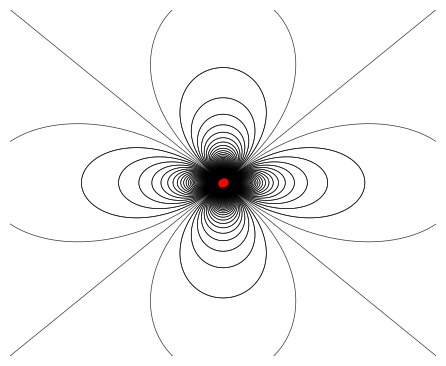

In [69]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.integrate import ode as ode
# from matplotlib import cm
# from itertools import product

# class charge:
#     def __init__(self, q, pos):
#         self.q=q
#         self.pos=pos
 
# def E_point_charge(q, a, x, y):
#     return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
#         q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
# def E_total(x, y, charges):
#     Ex, Ey=0, 0
#     for C in charges:
#         E=E_point_charge(C.q, C.pos, x, y)
#         Ex=Ex+E[0]
#         Ey=Ey+E[1]
#     return [ Ex, Ey ]

# def E_dir(t, y, charges):
#     Ex, Ey=E_total(y[0], y[1], charges)
#     n=np.sqrt(Ex**2+Ey*Ey)
#     return [Ex/n, Ey/n]

# # charges and positions
# d = 0.01
# # charges = [charge(-1/d, [0, -d]), charge(1/d, [0, d])]
# charges = [charge(1/d, [d, d]), charge(-1/d, [d, -d]), charge(1/d, [-d, -d]), charge(-1/d, [-d, d])]
# # charges = [charge(1/d, [d, d]), charge(1/d, [d, -d]), charge(1/d, [-d, -d]), charge(1/d, [-d, d]),
# #            charge(-1/d, [0, d]), charge(-1/d, [-d, 0]), charge(-1/d, [0, -d]), charge(-1/d, [d, 0])]
# n_lines = 2 * 2048

# # calculate field lines
# x0, x1=-3, 3
# y0, y1=-3, 3
# R=0.01
# # loop over all charges
# xs,ys = [],[]
# for C in charges:
#     # plot field lines starting in current charge
#     dt=0.8*R
#     if C.q<0:
#         dt=-dt
#     # loop over field lines starting in different directions 
#     # around current charge
#     for alpha in np.linspace(0, 2*np.pi*(n_lines-1)/n_lines, n_lines):
#         r=ode(E_dir)
#         r.set_integrator('vode')
#         r.set_f_params(charges)
#         x=[ C.pos[0] + np.cos(alpha)*R ]
#         y=[ C.pos[1] + np.sin(alpha)*R ]
#         r.set_initial_value([x[0], y[0]], 0)
#         while r.successful():
#             r.integrate(r.t+dt)
#             x.append(r.y[0])
#             y.append(r.y[1])
#             hit_charge=False
#             # check if field line left drwaing area or ends in some charge
#             for C2 in charges:
#                 if np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
#                     hit_charge=True
#             if hit_charge or (not (x0<r.y[0] and r.y[0]<x1)) or \
#                     (not (y0<r.y[1] and r.y[1]<y1)):
#                 break
#         xs.append(x)
#         ys.append(y)

# plt.figure(figsize=(5.5, 4.5),facecolor="w")

# # plot field line
# for x, y in zip(xs,ys):
#     plt.plot(x, y, color="k", linewidth=0.5, alpha=0.8)

# # plot point charges
# for C in charges:
#     if C.q>0:
#         plt.plot(C.pos[0], C.pos[1], 'ro', ms=5)#*np.sqrt(C.q))
#     if C.q<0:
#         plt.plot(C.pos[0], C.pos[1], 'bo', ms=0.05)#*np.sqrt(-C.q))

# plt.xlim(x0, x1)
# plt.ylim(y0, y1)
# plt.axis('off')
# plt.show()

# calculate and plot the electric potential

# def V_point_charge(q, a, x, y):
#     return q/((x-a[0])**2+(y-a[1])**2)**(0.5)

# def V_total(x, y, charges):
#     V=0
#     for C in charges:
#         Vp=V_point_charge(C.q, C.pos, x, y)
#         V = V+Vp
#     return V

# vvs = []
# xxs = []
# yys = []
# numcalcv = 300
# for xx,yy in product(np.linspace(x0,x1,numcalcv),np.linspace(y0,y1,numcalcv)):
#     xxs.append(xx)
#     yys.append(yy)
#     vvs.append(V_total(xx,yy,charges))
# xxs = np.array(xxs)
# yys = np.array(yys)
# vvs = np.array(vvs)

# clim0,clim1 = -2,2
# vvs[np.where(vvs<clim0)] = clim0*0.999999 # to avoid error
# vvs[np.where(vvs>clim1)] = clim1*0.999999 # to avoid error
# plt.tricontour(xxs,yys,vvs,10,colors="0.3")
# plt.tricontourf(xxs,yys,vvs,100,cmap=cm.jet)
# cbar = plt.colorbar()
# cbar.set_clim(clim0,clim1)
# cbar.set_ticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
# cbar.set_label("Electric Potential")
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.xlim(x0, x1)
# plt.ylim(y0, y1)
# plt.axes().set_aspect('equal','datalim')
# plt.savefig('electric_force_lines_1.png',dpi=250,bbox_inches="tight",pad_inches=0.02)
# plt.show()